# Movie Recommender System

Recommender Systems provide personalized suggestions for items that are most relevant to each user by predicting preferences according to user's past choices. They are used in various areas like movies, music, news, search queries, etc. These recommendations are made in two ways: 

<b>Collaborative filtering:</b> Collaborative filtering makes recommendations based on user's past behavior and similar decisions made by other users to predict items user may be interested in. For example, if User A likes movies X and Y and User B likes Y and Z then system might recommend movie Z to User A.

<b>Content-based filtering:</b> Content-based filtering recommends items based on the features of the items and the user's past preferences. For example, if a user likes action movies the system will recommend other action movies based on genres, actors or directors.

https://www.geeksforgeeks.org/machine-learning/python-implementation-of-movie-recommender-system/

## Import Libraries

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [10]:
#url = https://media.geeksforgeeks.org/wp-content/uploads/file.tsv
folder = "C:/Sereda/Job/portfolio/Python/Recommender_Movie/"
os.chdir(folder)
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv("file.tsv", sep='\t', names=column_names)
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [11]:
df.shape

(100003, 4)

### Load Movie Titles

Now we load another file that matches movie IDs to their titles. This helps us show the actual movie names instead of just numbers.

https://media.geeksforgeeks.org/wp-content/uploads/Movie_Id_Titles.csv

In [12]:
movie_titles = pd.read_csv('Movie_Id_Titles.csv')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


### Merging Both Datasets

We now combine the data about user ratings and movie titles and we can see both the movie names and the ratings for each movie.

In [13]:
data = pd.merge(df, movie_titles, on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


### Analyzing Movie Ratings

This gives us the <b>average rating</b> for each movie which is used to find top-rated movies.

In [16]:
average_ratings = data.groupby('title')['rating'].mean()
average_ratings.sort_values(ascending=False).head()

title
Aiqing wansui (1994)                                 5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
They Made Me a Criminal (1939)                       5.0
Name: rating, dtype: float64

We can also see <b>how many ratings</b> each movie has. Movies with more ratings are more important when we make recommendations.

In [17]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

## Feature Engineering

### Create a Ratings DataFrame

Stores the average rating and number of ratings for each movie. We’ll use this later to filter out movies with few ratings.

In [22]:
ratings = pd.DataFrame(average_ratings)
ratings['num of ratings'] = data.groupby('title')['rating'].count()
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [41]:
ratings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


### Visualize Ratings

In [24]:
sns.set_style('white')
%matplotlib inline

Show how many movies got how many ratings to help identify popular movies.

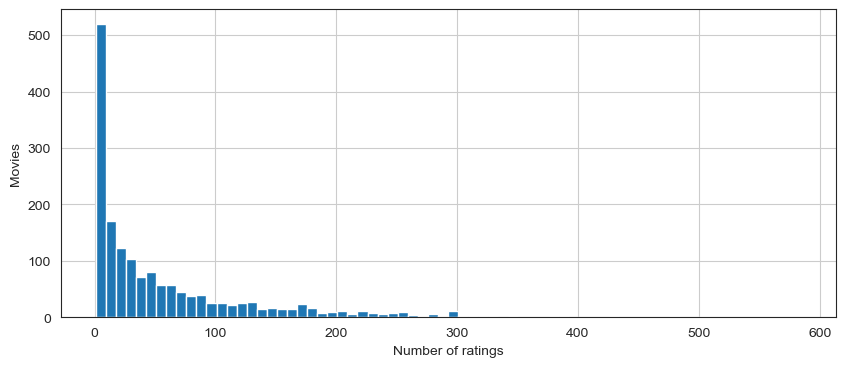

In [34]:
plt.figure(figsize =(10, 4))
plt.xlabel("Number of ratings")
plt.ylabel("Movies")
plt.show(ratings['num of ratings'].hist(bins = 70))

We now show the distribution of average ratings across movies

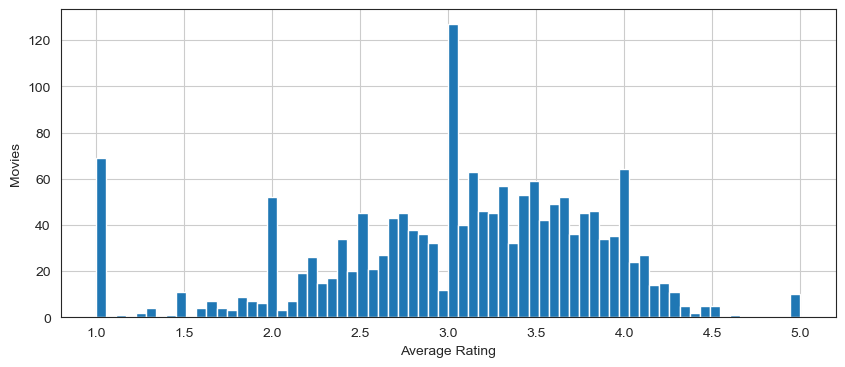

In [38]:
plt.figure(figsize =(10, 4))
plt.xlabel("Average Rating")
plt.ylabel("Movies")
plt.show(ratings['rating'].hist(bins = 70))

### Create User-Movie Matrix

We now create a matrix where each row represents a user and each column represents a movie. The values in this matrix are the ratings that users have given to each movie.

In [39]:
moviemat = data.pivot_table(index ='user_id', columns ='title', values ='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Finding Similar Movies using Collaborative Filtering

We compare how users rated other movies vs. "Star Wars (1977)". corrwith() calculates correlation with all other movies.

In [51]:
starwars_user_ratings = moviemat['Star Wars (1977)'] # Ratings of all users to this movie
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

We create a new DataFrame to store these correlations. Drop any NaN values (movies with no overlapping ratings).

In [46]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings) # Correlation of each movie with this movie
corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation'])
corr_starwars.dropna(inplace = True)
corr_starwars.head()

C:\Users\sered\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\sered\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\sered\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\sered\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\sered\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


### Filter Movies with Enough Ratings

Join the correlation data with our ratings dataframe. Filter movies that have more than 100 ratings for more reliable recommendations.

In [48]:
corr_starwars.sort_values('Correlation', ascending = False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
No Escape (1994),1.0
Man of the Year (1995),1.0
Cosi (1996),1.0
Commandments (1997),1.0
Golden Earrings (1947),1.0
"Scarlet Letter, The (1926)",1.0
Safe Passage (1994),1.0


In [49]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [50]:
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


### Trying Another Example

In [52]:
liarliar_user_ratings = moviemat['Liar Liar (1997)'] # Ratings of all users to this movie
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings) # Correlation of each movie with this movie
similar_to_liarliar.head()

C:\Users\sered\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\sered\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\sered\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\sered\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\sered\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

In [54]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation'])
corr_liarliar.dropna(inplace = True)

corr_liarliar = corr_liarliar.join(ratings['num of ratings'])
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


## Content-Based Movie Recommender System: TF-IDF + Cosine Similarity Recommender

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### Data

Let's try <b>MovieLens developmental dataset</b>, which is the smallest and most recent one.

https://files.grouplens.org/datasets/movielens/ml-latest-small-README.html

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

`ratings.csv`: Each line of this file after the header row represents one rating of one movie by one user, and has the following format: userId,movieId,rating,timestamp.

The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

`tags.csv`: Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format: userId,movieId,tag,timestamp.

The lines within this file are ordered first by userId, then, within user, by movieId.

Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

`movies.csv`: Each line of this file after the header row represents one movie, and has the following format: movieId,title,genres. Movie titles are entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

Genres are a pipe-separated list, and are selected from the following:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* (no genres listed)

In [ ]:
`links.csv`: contains identifiers that can be used to link to other sources of movie data. Each line of this file after the header row represents one movie, and has the following format: movieId,imdbId,tmdbId.


In [59]:
import os
import zipfile
import urllib.request
import pandas as pd

In [60]:
# 1. Download the zip
url = "https://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
zip_path = "ml-latest-small.zip"
urllib.request.urlretrieve(url, zip_path)
print("Downloaded:", zip_path)

Downloaded: ml-latest-small.zip


In [61]:
# 2. Unzip
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall("ml-latest-small")
print("Extracted to folder ml-latest-small")

Extracted to folder ml-latest-small


In [63]:
# 3. Load movies.csv
movies_csv = os.path.join("ml-latest-small", "movies.csv")
df_movies = pd.read_csv(movies_csv)

print(df_movies.head())
print(df_movies.columns)

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
Index(['movieId', 'title', 'genres'], dtype='object')


In [68]:
df_movies.shape

(9742, 3)

In [65]:
tmdb_csv = os.path.join("ml-latest-small", "tags.csv")
tmdb_df = pd.read_csv(tmdb_csv)
tmdb_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [69]:
tmdb_df.shape

(3683, 4)

In [71]:
# 3. Merge MovieLens with TMDB descriptions
final_df = df_movies.merge(tmdb_df, on="movieId", how="right")

# Optional: Remove movies with no description
final_df = final_df[final_df["tag"].notna()]

print("\nSample rows with descriptions:")
print(final_df[["movieId", "title", "genres", "tag"]].head())

# Save to CSV for your recommender system
final_df.to_csv("movielens_with_descriptions.csv", index=False)
print("\nSaved merged dataset as: movielens_with_descriptions.csv")


Sample rows with descriptions:
   movieId                 title  genres              tag
0    60756  Step Brothers (2008)  Comedy            funny
1    60756  Step Brothers (2008)  Comedy  Highly quotable
2    60756  Step Brothers (2008)  Comedy     will ferrell
3    89774        Warrior (2011)   Drama     Boxing story
4    89774        Warrior (2011)   Drama              MMA

Saved merged dataset as: movielens_with_descriptions.csv


In [77]:
# 4. Combine tags/descriptions for each movie
movie_tags = final_df.groupby(['movieId', 'title'])['tag'].apply(lambda x: " ".join(x)).reset_index()
print(movie_tags.shape)
movie_tags.head(2)

(1572, 3)


,movieId,title,tag
0,1,Toy Story (1995),pixar pixar fun
1,2,Jumanji (1995),fantasy magic board game Robin Williams game


Joins multiple user-generated tags/descriptions into a single text field. Because MovieLens tags are sparse, this produces richer descriptions.

In [78]:
# 5. TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movie_tags['tag'])

TF-IDF emphasizes distinctive words and down-weights frequent ones.

In [82]:
# 6. Cosine similarity matrix (movie × movie)
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(cosine_sim.shape)

(1572, 1572)


This produces a similarity score between every pair of movies.

In [83]:
movie_tags.index

RangeIndex(start=0, stop=1572, step=1)

In [85]:
movie_tags['title']

0                         Toy Story (1995)
1                           Jumanji (1995)
2                  Grumpier Old Men (1995)
3       Father of the Bride Part II (1995)
4                           Sabrina (1995)
                       ...                
1567                     Game Night (2018)
1568                    Tomb Raider (2018)
1569                     Deadpool 2 (2018)
1570        Solo: A Star Wars Story (2018)
1571             Gintama: The Movie (2010)
Name: title, Length: 1572, dtype: object

In [88]:
# Helper: map title → index
title_to_index = pd.Series(movie_tags.index, index=movie_tags['title']).drop_duplicates()
print(title_to_index.shape)
title_to_index.head(2)

(1572,)


title
Toy Story (1995)    0
Jumanji (1995)      1
dtype: int64

In [89]:
# 7. Recommend similar movies
def recommend(title, top_n=5):
    if title not in title_to_index:
        print("Movie not found.")
        return []

    # index of the movie we're comparing against
    idx = title_to_index[title]

    # similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # sort by similarity descending, skip the movie itself (index 0)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1: top_n + 1]

    # indices of similar movies
    movie_indices = [i[0] for i in sim_scores]

    # return titles
    return movie_tags.iloc[movie_indices][['movieId', 'title']]

Makes movie recommendations based on semantic similarity of the tags/descriptions.

In [90]:
# 8. Example usage
print("Similar movies to 'Toy Story (1995)':")
print(recommend("Toy Story (1995)", top_n=5))

Similar movies to 'Toy Story (1995)':
      movieId                             title
544      2355              Bug's Life, A (1998)
666      3114                Toy Story 2 (1999)
1524   122918  Guardians of the Galaxy 2 (2017)
1427    68954                         Up (2009)
1510   115617                 Big Hero 6 (2014)
